<h3 align=center> Data Science & Business Analytics Internship</h3>
<h3 align=center>The Sparks Foundation</h3> 
<h3 align=right>Author: Mohammad Tarique Anjum</h3>

<h3>Task1 - Prediction Using Supervised Machine Learning</h3>
<h3>Predict the percentage scores of a student based on the number of study hours</h3>

<h4>Importing the necessary libraries</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data into a dataframe from a remote source [dataset](http://bit.ly/w-data)

In [2]:
url = 'http://bit.ly/w-data'
stu_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


#### Displaying first 10 rows of the dataset

In [3]:
stu_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Statistical description of the dataset

In [4]:
stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting a graph of percentage scores vs hours studied 

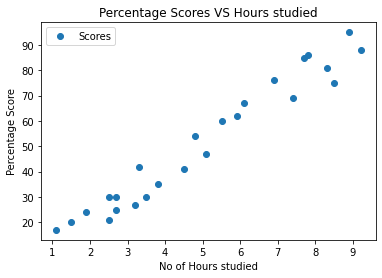

In [5]:
stu_data.plot(x='Hours',y='Scores',style='o')
plt.title('Percentage Scores VS Hours studied')
plt.xlabel('No of Hours studied')
plt.ylabel('Percentage Score')
plt.show()

#### The above graph depicts a direct relation between percentage scores achieved and no of hours studied by the student

### Preparing the data

In [6]:
X = stu_data['Hours'].values
X.shape

(25,)

In [7]:
X = X.reshape(25,1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
y = stu_data['Scores'].values 
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the data into training set and testing set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [11]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [12]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [13]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [14]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### Training a linear regression model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Linear Regression model is trained successfully")

Linear Regression model is trained successfully


#### Regression plot

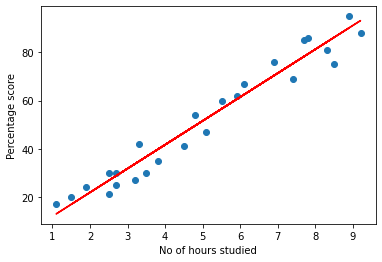

In [17]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line, color="red")
plt.xlabel('No of hours studied')
plt.ylabel('Percentage score')
plt.show()

### Evaluating the model on test data

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
pd.DataFrame(({'Actual': y_test, 'Predicted': y_pred}))

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting scores based on given number of hours

In [20]:
hours = float(input('Enter number of hours: '))
own_pred = regressor.predict([[hours]])
print("Number of hours studied = {}".format(hours))
print("Predicted Percentage score = {}".format(own_pred[0]))

Enter number of hours: 9.25
Number of hours studied = 9.25
Predicted Percentage score = 93.69173248737538


Hence, The predicted score of a student who studies for <i>9.25 hrs/day</i> is around <b>93.69</b>

#### Checking accuracy of the model

In [21]:
from sklearn import metrics

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Max Error: ', metrics.max_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
Max Error:  6.732260779489842
Mean Squared Error: 21.5987693072174
